
<center><img src="https://koaning.io/posts/gaussian-auto-embeddings/gaussian-auto-embeddings_files/autoencoder1.png"></center>

## Imports



In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

## Preprocessing

### Load dataset

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

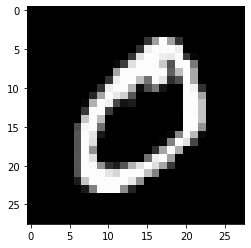

In [3]:
plt.imshow(X_train[1], cmap="gray")

### Data normalization

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Add noise to the dataset

In [5]:
X_train = np.reshape(X_train,(-1, 28, 28, 1))
X_test = np.reshape(X_test,(-1, 28, 28, 1))

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Learning

### Building Autoencoder

In [6]:
X_input = tf.keras.layers.Input((28,28,1))
# encoder
X = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same')(X_input)
X = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same')(X)
# latent space
encoded = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='same')(X)
# decoder
X = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same')(encoded)
X = tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding='same')(X)

model = tf.keras.models.Model(inputs=X_input, outputs=X)
encoder = tf.keras.models.Model(X_input, encoded)

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
___________________________________________________________

### Train

In [7]:
history = model.fit(X_train, X_train, batch_size=100, validation_split=0.1, epochs=30)

Epoch 1/30
540/540 [==============================] - 2s 4ms/step - loss: 0.1701 - val_loss: 0.0834
Epoch 2/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0770 - val_loss: 0.0747
Epoch 3/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0727 - val_loss: 0.0721
Epoch 4/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0705 - val_loss: 0.0702
Epoch 5/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0690 - val_loss: 0.0690
Epoch 6/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0682 - val_loss: 0.0685
Epoch 7/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0677 - val_loss: 0.0680
Epoch 8/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0673 - val_loss: 0.0677
Epoch 9/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0671 - val_loss: 0.0675
Epoch 10/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0669 - val_loss: 0.0673

### Evaluation

In [8]:
print(model.layers[3].get_weights()[1])
print(encoder.layers[3].get_weights()[1])

[-0.19894359 -0.16227888 -0.22362225  0.16559769  0.17181249  0.26854068
 -0.30294713 -0.07943465]
[-0.19894359 -0.16227888 -0.22362225  0.16559769  0.17181249  0.26854068
 -0.30294713 -0.07943465]


#### Pixels as features

In [9]:
X_train_pixels = np.reshape(X_train,(60000, 28*28))
print(X_train_pixels.shape)
print(y_train.shape)

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
nb = RandomForestClassifier(n_estimators=500)

nb.fit(X_train_pixels, y_train)
y_train_pred = nb.predict(X_train_pixels)

from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

(60000, 784)
(60000,)


1.0

#### PCA as features

In [10]:
from sklearn.decomposition import PCA

X_train_pca = np.reshape(X_train,(60000, 28*28))
pca = PCA(n_components=7*7*8)  # same size as autoencoder latent space
X_train_pca = pca.fit_transform(X_train_pca)
print(X_train_pca.shape)
print(y_train.shape)

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
nb = RandomForestClassifier(n_estimators=500)

nb.fit(X_train_pca, y_train)
y_train_pred = nb.predict(X_train_pca)

from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

(60000, 392)
(60000,)


KeyboardInterrupt: ignored

Embedding as features

In [ ]:
from sklearn.decomposition import PCA

X_train_emb = encoder.predict(X_train)
print(X_train_emb.shape)
print(y_train.shape)
X_train_emb = np.reshape(X_train_emb, (60000,7*7*8))
print(X_train_emb.shape)
print(y_train.shape)

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
nb = RandomForestClassifier(n_estimators=500)

nb.fit(X_train_emb, y_train)
y_train_pred = nb.predict(X_train_emb)

from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)